In [1]:
import pandas as pd

In [2]:
data = 'food101/images/red_velvet_cake'

In [3]:
data

'food101/images/red_velvet_cake'

In [4]:
import os

In [5]:
dataSet = os.path.join(data, os.listdir(data)[0])

In [6]:
from PIL import Image

In [7]:
img = Image.open(dataSet)
print(img.size)
img.show()

(512, 512)


In [8]:
from IPython.display import display

In [9]:
data = 'food101/images'

In [10]:
first_img = os.listdir(data)[0]
img_file = os.listdir(os.path.join(data, first_img))[0]

In [11]:
img_path = os.path.join(data, first_img, img_file)

(512, 512)


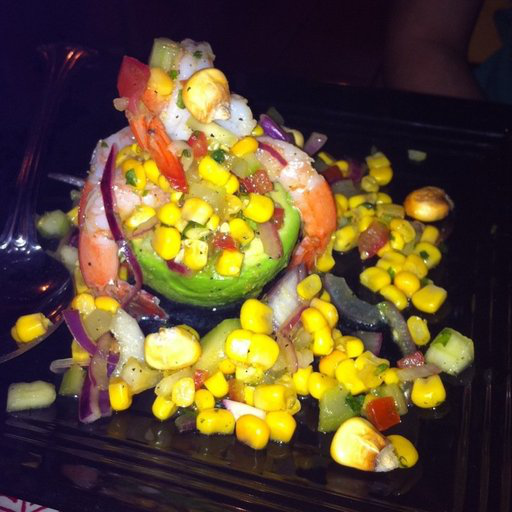

In [12]:
img = Image.open(img_path)
print(img.size)
display(img)

In [13]:
data = 'food101/images'
classes = os.listdir(data)
print("Total classes:", len(classes))

Total classes: 86


In [16]:
d = []
for cls in classes:
    count = len(os.listdir(os.path.join(data, cls)))
    d.append([cls, count])

df = pd.DataFrame(d, columns=["food_name","img_in_each_class"])
df = df.sort_values("img_in_each_class", ascending=False)
df.head(20)

,food_name,img_in_each_class
1,cheesecake,1000
2,cheese_plate,1000
5,chicken_wings,1000
3,chicken_curry,1000
7,chocolate_mousse,1000
6,chocolate_cake,1000
14,cup_cakes,1000
15,deviled_eggs,1000
8,churros,1000
9,clam_chowder,1000


In [17]:
import random

In [18]:
dims = []
for i in range(200):      
    cls = random.choice(classes)
    img_file = random.choice(os.listdir(os.path.join(data,cls)))
    path = os.path.join(data,cls,img_file)
    img = Image.open(path)
    dims.append(img.size)  

pd.Series([w for w,h in dims]).describe(), pd.Series([h for w,h in dims]).describe()

(count    200.000000
 mean     501.955000
 std       35.705284
 min      306.000000
 25%      512.000000
 50%      512.000000
 75%      512.000000
 max      512.000000
 dtype: float64,
 count    200.000000
 mean     477.040000
 std       65.026074
 min      287.000000
 25%      512.000000
 50%      512.000000
 75%      512.000000
 max      512.000000
 dtype: float64)

In [19]:
import matplotlib.pyplot as plt

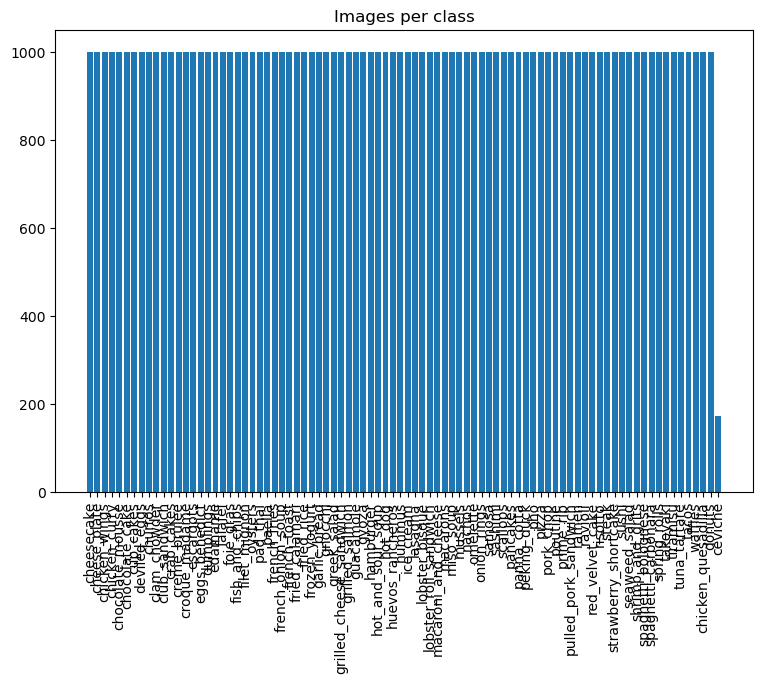

In [20]:
plt.figure(figsize=(9,6))
plt.bar(df["food_name"], df["img_in_each_class"])
plt.xticks(rotation=90)
plt.title("Images per class")
plt.show()

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [23]:
train_generator = train_datagen.flow_from_directory(
    'food101/images',               
    target_size=(224, 224),   
    batch_size=32,
    class_mode='categorical',  
    subset='training',
    shuffle = True
)

Found 68139 images belonging to 86 classes.


In [24]:
val_generator = train_datagen.flow_from_directory(
    'food101/images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle = False
)

Found 17032 images belonging to 86 classes.


In [25]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [26]:
base_model.trainable = False

In [28]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

C:\Users\Shristi Kumari\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2520s 1s/step - accuracy: 0.4728 - loss: 2.0692 - val_accuracy: 0.5379 - val_loss: 1.7850
Epoch 2/5
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2142s 1s/step - accuracy: 0.5827 - loss: 1.5772 - val_accuracy: 0.5601 - val_loss: 1.7013
Epoch 3/5
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2071s 972ms/step - accuracy: 0.6141 - loss: 1.4286 - val_accuracy: 0.5638 - val_loss: 1.7065
Epoch 4/5
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2496s 1s/step - accuracy: 0.6416 - loss: 1.3182 - val_accuracy: 0.5608 - val_loss: 1.7389
Epoch 5/5
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2565s 1s/step - accuracy: 0.6604 - loss: 1.2296 - val_accuracy: 0.5609 - val_loss: 1.7501


In [31]:
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2075s 974ms/step - accuracy: 0.6788 - loss: 1.1571 - val_accuracy: 0.5652 - val_loss: 1.7751
Epoch 2/5
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2422s 1s/step - accuracy: 0.6933 - loss: 1.0889 - val_accuracy: 0.5607 - val_loss: 1.8647
Epoch 3/5
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 3009s 1s/step - accuracy: 0.7073 - loss: 1.0321 - val_accuracy: 0.5610 - val_loss: 1.8816
Epoch 4/5
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2348s 1s/step - accuracy: 0.7212 - loss: 0.9778 - val_accuracy: 0.5497 - val_loss: 1.9582
Epoch 5/5
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2628s 1s/step - accuracy: 0.7336 - loss: 0.9262 - val_accuracy: 0.5481 - val_loss: 1.9984


In [32]:
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2
)

Epoch 1/2
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2289s 1s/step - accuracy: 0.7440 - loss: 0.8830 - val_accuracy: 0.5439 - val_loss: 2.0672
Epoch 2/2
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2448s 1s/step - accuracy: 0.7538 - loss: 0.8404 - val_accuracy: 0.5491 - val_loss: 2.1402


In [33]:
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2
)

Epoch 1/2
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2489s 1s/step - accuracy: 0.7636 - loss: 0.7997 - val_accuracy: 0.5459 - val_loss: 2.2248
Epoch 2/2
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2788s 1s/step - accuracy: 0.7737 - loss: 0.7641 - val_accuracy: 0.5374 - val_loss: 2.3000


In [34]:
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2
)

Epoch 1/2
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2269s 1s/step - accuracy: 0.7830 - loss: 0.7290 - val_accuracy: 0.5328 - val_loss: 2.3930
Epoch 2/2
2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2581s 1s/step - accuracy: 0.7898 - loss: 0.7023 - val_accuracy: 0.5343 - val_loss: 2.4271


In [35]:
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=1
)

2130/2130 ━━━━━━━━━━━━━━━━━━━━ 2461s 1s/step - accuracy: 0.7994 - loss: 0.6669 - val_accuracy: 0.5322 - val_loss: 2.5101


In [36]:
model.save('food_prediction_17epoches.h5')